In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
from tensorflow.keras.applications import VGG16,ResNet50,InceptionV3

In [ ]:
! unzip cats_and_dogs.zip

Archive:  cats_and_dogs.zip
replace cats_and_dogs/train/cats/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
base_model = VGG16(weights='imagenet',include_top='False',input_shape=(224,224,3))

base_model.trainable = False

In [ ]:
# adding the top layer

x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(1, activation= 'sigmoid') (x)

model = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255)
validation_datagen = ImageDataGenerator(
        rescale=1./255)

In [ ]:
train_gen = train_datagen.flow_from_directory(
        'cats_and_dogs/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

validation_gen = validation_datagen.flow_from_directory(
        'cats_and_dogs/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
model_history = model.fit(train_gen,epochs=10,validation_data=validation_gen)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 311ms/step - accuracy: 0.5182 - loss: 0.6918 - val_accuracy: 0.7005 - val_loss: 0.6822
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 250ms/step - accuracy: 0.7007 - loss: 0.6762 - val_accuracy: 0.6925 - val_loss: 0.6567
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 256ms/step - accuracy: 0.6754 - loss: 0.6509 - val_accuracy: 0.7225 - val_loss: 0.6234
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - accuracy: 0.7124 - loss: 0.6166 - val_accuracy: 0.7150 - val_loss: 0.5921
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - accuracy: 0.7026 - loss: 0.5937 - val_accuracy: 0.7140 - val_loss: 0.5715
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - accuracy: 0.7167 - loss: 0.5633 - val_accuracy: 0.7170 - val_loss: 0.5560
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.7431 - loss: 0.5422 - val_accuracy: 0.7540 - val_loss: 0.5279
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 255ms/step - accuracy: 0.7238 - loss: 0.5339 - val_accuracy: 0.746

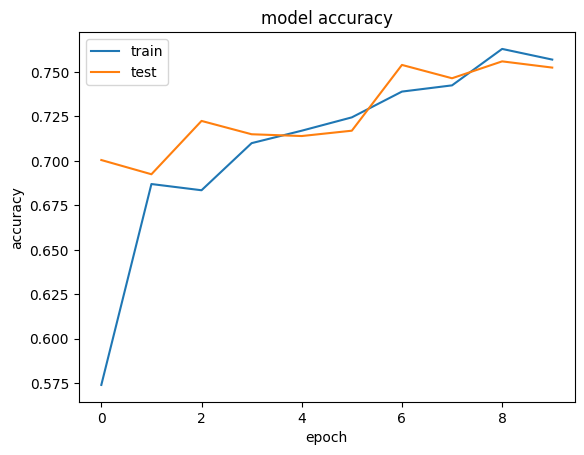

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Inception V3

In [ ]:
base_model = InceptionV3(weights='imagenet',include_top='False',input_shape=(299,299,3))

base_model.trainable = False

NameError: name 'InceptionV3' is not defined

In [ ]:
# Adding the top layer

x = base_model.output
x = Flatten()(x)

x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(1,activation='softmax')(x)

model= Model(inputs=base_model.input,outputs=predictions)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255)
validation_datagen = ImageDataGenerator(
        rescale=1./255)

In [ ]:
train_gen = train_datagen.flow_from_directory(
        'cats_and_dogs/train',
        target_size=(299, 299),
        batch_size=32,
        class_mode='binary')

validation_gen = validation_datagen.flow_from_directory(
        'cats_and_dogs/train',
        target_size=(299, 299),
        batch_size=32,

In [ ]:
model = model.fit(train_gen,epochs=10,validation_data=validation_gen)

## Evaluation matrix

Found 1000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━

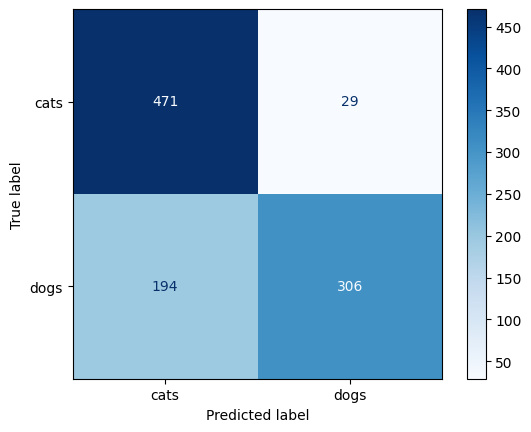

In [ ]:
def evaluate_model(model, generator):
  y_true = []
  y_pred = []

  for i in range(len(generator)):
    x_batch, y_batch = next(generator) # getting data in batch
    y_true.extend(y_batch) # true labels
    preds = model.predict(x_batch) # probabilities

    y_pred.extend(preds.flatten()) # flatten and collecting predictions

  y_pred_binary = [1 if pred >0.5 else 0 for pred in y_pred]
  # confusion matrix
  cm = confusion_matrix(y_true, y_pred_binary)
  print("Confusion matrix :", cm)
  # classification report
  class_labels = list(generator.class_indices.keys()) # [cats, dogs]
  cr = classification_report(y_true, y_pred_binary, target_names = class_labels, labels = [0,1])
  print("Classification report :", cr)
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_labels)
  disp.plot(cmap = plt.cm.Blues)
  plt.show()

validation_gen = validation_datagen.flow_from_directory('/content/cats_and_dogs/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle = False) # preserve the sequence
evaluate_model(model, validation_gen)

Found 1000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


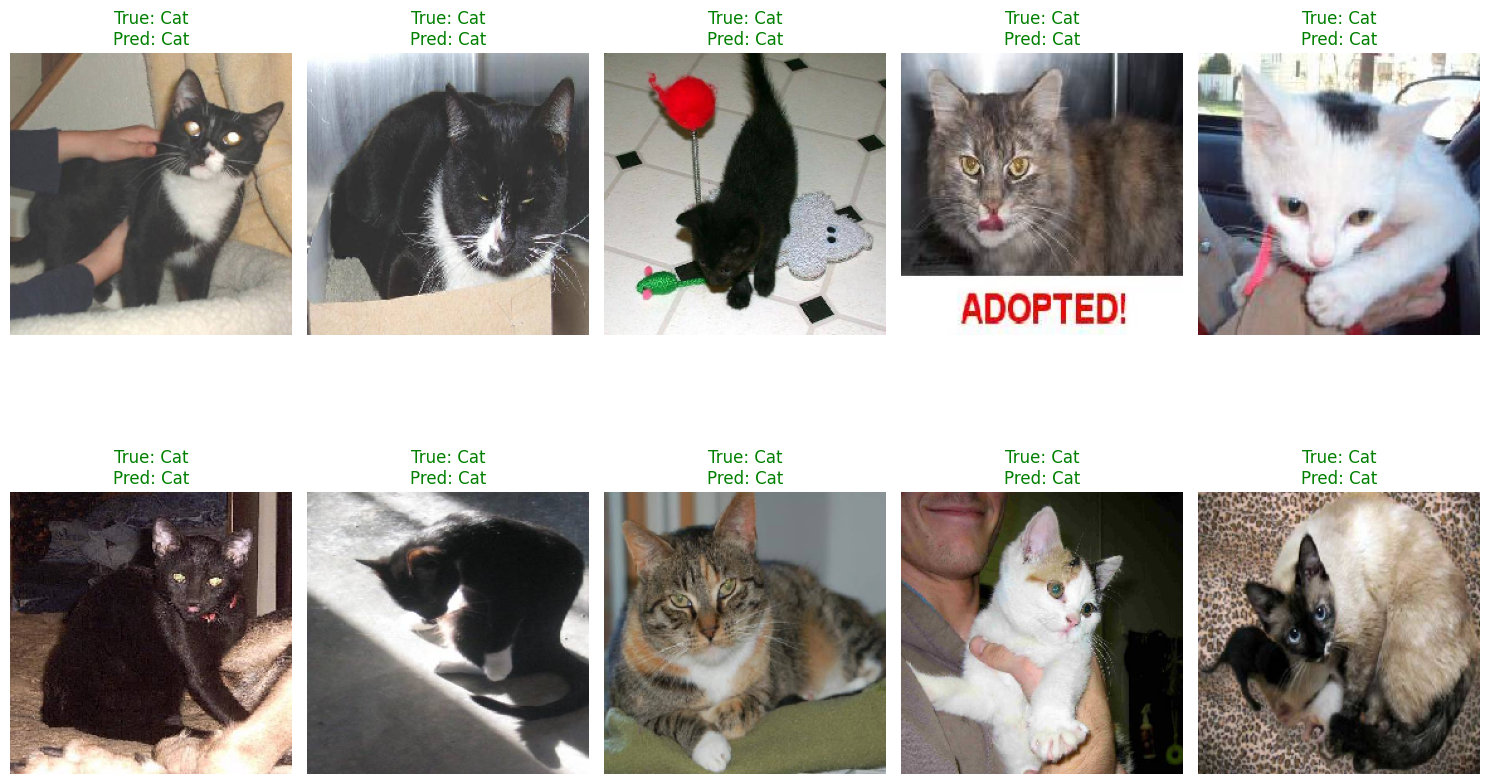

In [ ]:
def visualize_predictions(generator, model , num_images = 10):
  x_batch, y_batch = next(generator)
  predictions = model.predict(x_batch)

  y_pred_binary = [1 if pred >0.5 else 0 for pred in predictions]

  plt.figure(figsize = (15, 10))

  for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_batch[i])

    true_label = 'Dog' if y_batch[i] == 1 else 'Cat'
    pred_label = 'Dog' if y_pred_binary[i] == 1 else 'Cat'

    color = 'green' if true_label == pred_label else 'red'
    plt.title(f'True: {true_label}\nPred: {pred_label}', color = color)
    plt.axis('off')

  plt.tight_layout()
  plt.show()

validation_gen = validation_datagen.flow_from_directory('/content/cats_and_dogs/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle = False) # preserve the sequence

visualize_predictions(validation_gen, model, num_images=10)
